In [1]:
from google.colab import files

# Unggah file
uploaded = files.upload()

Saving UAP_Dataset.zip to UAP_Dataset.zip


In [2]:
import zipfile

# Ekstrak file ZIP
with zipfile.ZipFile('UAP_Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')


In [3]:
import pandas as pd

# Ganti 'diabetes.csv' dengan nama file dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Tampilkan beberapa baris pertama
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


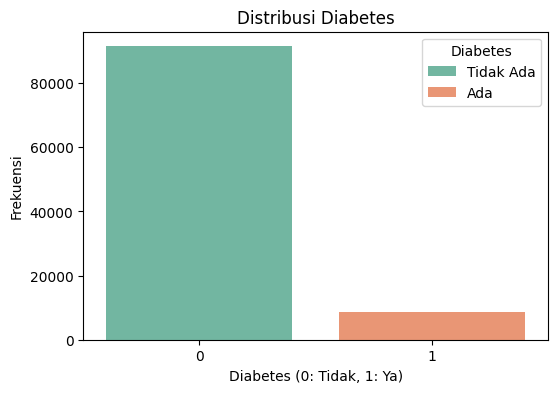

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label 'diabetes' dengan hue dan palette
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df, hue='diabetes', palette='Set2', dodge=False)
plt.title('Distribusi Diabetes')
plt.xlabel('Diabetes (0: Tidak, 1: Ya)')
plt.ylabel('Frekuensi')
plt.legend(title='Diabetes', labels=['Tidak Ada', 'Ada'], loc='upper right')  # Menambahkan label untuk legend
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
label_encoder = LabelEncoder()

# Kolom yang perlu di-encode
columns_to_encode = ['gender', 'smoking_history']  # Kolom kategorikal pada dataset Anda

# Dictionary untuk menyimpan mapping
column_mappings = {}

# Melakukan encoding dan menyimpan mapping
for column in columns_to_encode:
    label_encoder.fit(df[column])
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    column_mappings[column] = mapping
    df[column] = label_encoder.transform(df[column])

# Menampilkan hasil encoding
print("Hasil Encoding Dataset:")
print(df.head())

# Menampilkan mapping
print("\nMapping untuk setiap kolom:")
for column, mapping in column_mappings.items():
    print(f"{column}: {mapping}")


Hasil Encoding Dataset:
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Mapping untuk setiap kolom:
gender: {'Female': 0, 'Male': 1, 'Other': 2}
smoking_history: {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Kolom numerik yang akan diskalakan
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Melakukan scaling dan mengganti nilai di dataset
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Menampilkan hasil scaling
print("Hasil Scaling dengan MinMaxScaler:")
print(df.head())


Hasil Scaling dengan MinMaxScaler:
   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.000000             0              1                4  0.177171   
1       0  0.674675             0              0                0  0.202031   
2       1  0.349349             0              0                4  0.202031   
3       0  0.449449             0              0                1  0.156863   
4       1  0.949950             1              1                1  0.118231   

   HbA1c_level  blood_glucose_level  diabetes  
0     0.563636             0.272727         0  
1     0.563636             0.000000         0  
2     0.400000             0.354545         0  
3     0.272727             0.340909         0  
4     0.236364             0.340909         0  


In [7]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import pickle

# Encode categorical variables
encoding = {
    'gender': {'Female': 0, 'Male': 1},
    'smoking_history': {'never': 0, 'No Info': 1, 'current': 2}
}
df.replace(encoding, inplace=True)

# Split features and target
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance by calculating scale_pos_weight
scale_pos_weight = np.sum(y == 0) / np.sum(y == 1) if np.sum(y == 1) > 0 else 1

# Initialize XGBoost Classifier
model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     18292
           1       0.53      0.88      0.66      1708

    accuracy                           0.92     20000
   macro avg       0.76      0.90      0.81     20000
weighted avg       0.95      0.92      0.93     20000



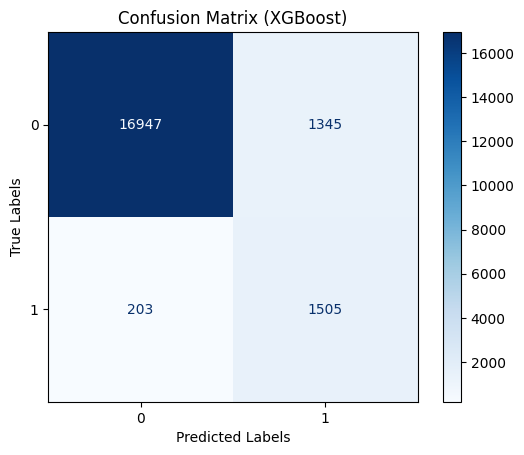

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix sebagai gambar
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix (XGBoost)")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()

In [9]:
# Save the model as .pkl
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as xgboost_model.pkl")

Model saved as xgboost_model.pkl
